# Maps of Norway using cartopy

In [1]:
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader


In [2]:
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams["axes.labelsize"]= 14
plt.rcParams["figure.facecolor"] = "#f2f2f2"
#plt.rcParams['figure.savefig.dpi'] = 100
plt.rcParams['savefig.edgecolor'] = "#f2f2f2"
plt.rcParams['savefig.facecolor'] ="#f2f2f2"
plt.rcParams["figure.figsize"] = [15,8]
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['font.size'] = 14
greens = ['#66c2a4','#41ae76','#238b45','#006d2c','#00441b']
multi =['#66c2a4','#1f78b4','#a6cee3','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f']
plt.rcParams["axes.color_cycle"] = multi


//anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


#### Simple example using add_feature 

//anaconda/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


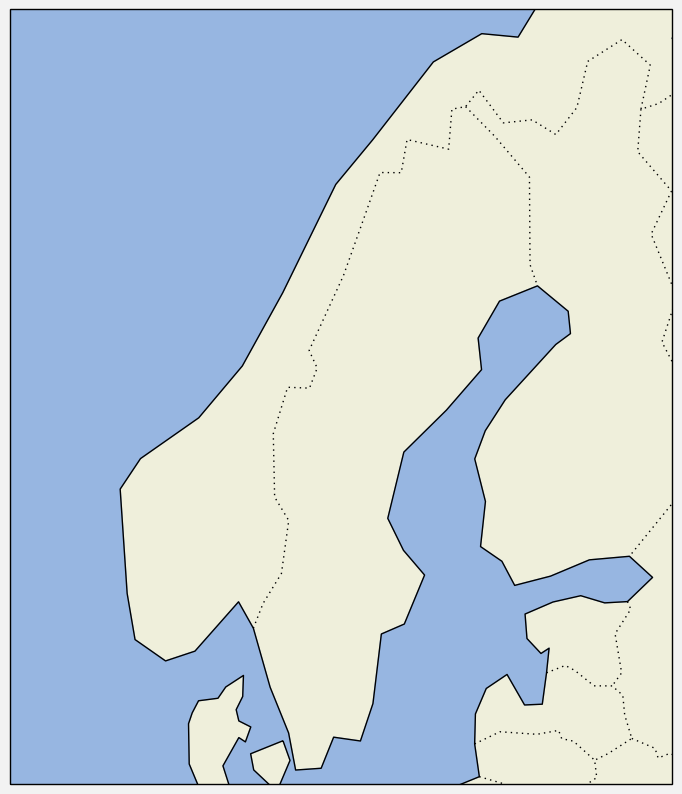

In [4]:
proj = ccrs.Mercator()

plt.figure(figsize = (10,10))
ax = plt.axes(projection=proj)
ax.set_extent((0, 30.0, 55, 70))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
plt.show()

#### Now using shape files

#### automatic download from natural earth - only up for fylke

In [5]:
kw = dict(resolution='10m', category='cultural',
          name='admin_1_states_provinces')

states_shp = shpreader.natural_earth(**kw)

shp = shpreader.Reader(states_shp)


In [31]:
cities = ["Bergen", "Oslo", "Trondheim", "Stavanger", "Kristiansand", "Tromsø"]
#(long, lat)
coords = [[5.3221, 60.3913], [10.7522, 59.9139], [10.3951, 63.4305], [5.7331, 58.9700],
        [8.0182, 58.1599], [18.9553, 69.6492]]
city_coords = zip(cities, coords)

//anaconda/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


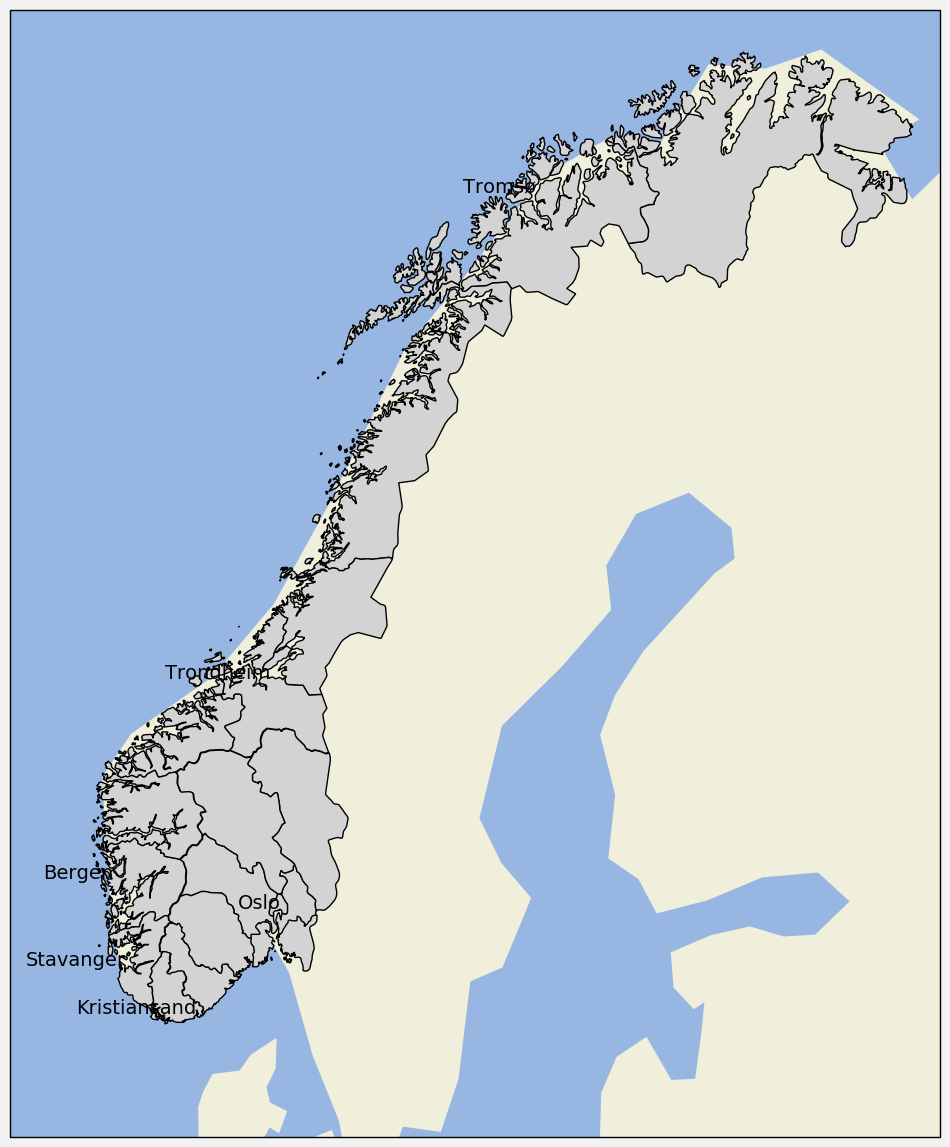

In [32]:
subplot_kw = dict(projection=ccrs.Mercator())

fig, ax = plt.subplots(figsize=(12, 15),
                       subplot_kw=subplot_kw)
ax.set_extent((2, 32.0, 56, 71))
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
for record, state in zip(shp.records(), shp.geometries()):
    if record.attributes['admin'] == 'Norway':
          ax.add_geometries([state], ccrs.PlateCarree(), facecolor="lightGray", edgecolor='black')
for city, coords in city_coords: 
    plt.text(coords[0],coords[1], city,
             horizontalalignment='right',
             transform=ccrs.Geodetic())
plt.show()

### shape files from kartverket

In [54]:
#filer
shape_country = 'norway_shape/NOR_adm_shp/NOR_adm0'
shape_county = 'norway_shape/NOR_adm_shp/NOR_adm1'
shape_princ = 'norway_shape/kartverket/kommuner/kommuner'


#### kommuner

In [71]:
#Norway boundary
reader_norway = shpreader.Reader(shape_country)
norway = reader_norway.geometries()
norway_geom = next(norway)
norway_rec = reader_norway.records()

In [64]:
next(norway_rec)

In [65]:
#kommuner
reader_princ = shpreader.Reader(shape_princ)

princ = reader_princ.geometries()
princ_rec = reader_princ.records()

In [66]:
rec = next(princ_rec)
rec

<Record: <shapely.geometry.multipolygon.MultiPolygon object at 0x12d6e8ef0>, {'y': 6746055.97, 'perimeter': 103027.97301, 'x': -17479.25, 'poly_id': 172760, 'area': 313445071.39394, 'objtype': 'Kommune', 'navn': 'Osterøy\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', 'noyaktighe': 0, 'h_noyaktig': 0, 'malemetode': 0, 'oppr': 4, 'komm': 1253, 'max_avvik': 0, 'synbarhet': 0, 'koordh': 0.0, 'poly_': 1, 'h_malemeto': 0}, <fields>>

In [67]:
subplot_kw = dict(projection=ccrs.Mercator())

fig, ax = plt.subplots(figsize=(12, 15),
                       subplot_kw=subplot_kw)
ax.set_extent((2, 32.0, 56, 71))
    

In [69]:
ax.add_geometries(norway_geom, ccrs.PlateCarree(), facecolor="white", edgecolor='black')

//anaconda/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


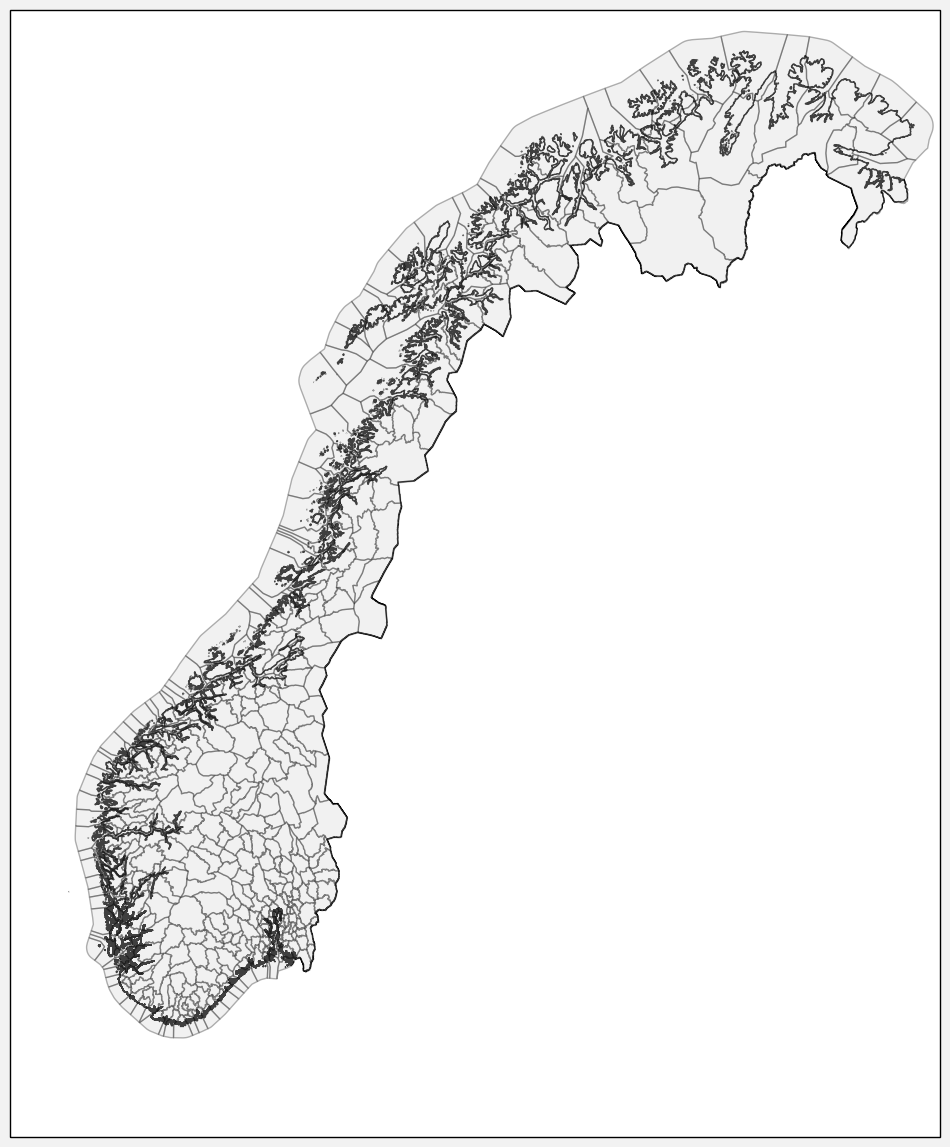

In [70]:
for princ, rec in zip(reader_princ.geometries(), reader_princ.records()):
    ax.add_geometries(princ, ccrs.PlateCarree(), facecolor="lightGrey", edgecolor='black', alpha=.3)
plt.show()

In [7]:
income = pd.read_csv("http://data.ssb.no/api/v0/dataset/49678.csv", sep=";", na_values = [".", ".."])

income_2015 = income[income.tid==2015]
income_2015 = income_2015[income_2015.husholdningstype =="0000 Alle husholdninger"]
income_2015 = income_2015[income_2015.statistikkvariabel =="Inntekt etter skatt, median (kr)"]
income_2015 = income_2015.iloc[:,[0,4]]
income_2015.columns = ["region", "income"]

income_2015.loc[:,"income"] = income_2015.income.astype(float)

kode = income_2015.region.str.split(" ").str.get(0)
income_2015_dict = dict(zip(kode, income_2015.income.values))
income_2015.income.min()

376000.0

In [ ]:
values = income_2015

In [11]:
#Colors http://matplotlib.org/examples/color/colormaps_reference.html
#http://matplotlib.org/users/colormaps.html
#normalize - convert numbers to values
num_colors=10
norm = mpl.colors.Normalize(vmin=income_2015.income.min(), vmax=income_2015.income.max())
cmap = plt.cm.Greens
bins = np.linspace(income_2015.income.min(), income_2015.income.max(), num_colors)

#test
#cmap(norm(451000))

//anaconda/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


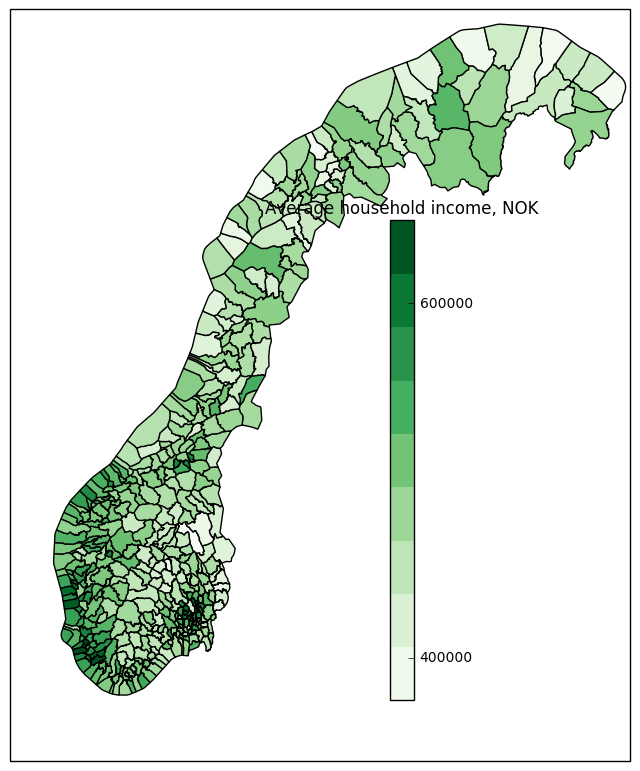

In [48]:
subplot_kw = dict(projection=ccrs.Mercator())

fig, ax = plt.subplots(figsize=(8, 12),
                       subplot_kw=subplot_kw)
ax.set_extent((2, 32.0, 56, 71))

for princ, rec in zip(reader_princ.geometries(), reader_princ.records()):
    kode = rec.attributes["komm"]
    if kode<1000:
        kode = "0" + str(kode)
    else:
        kode = str(kode)
    color= cmap(norm(income_2015_dict[kode]))      
    ax.add_geometries(princ, ccrs.PlateCarree(), facecolor=color, edgecolor='black')

#setting colorbar
#legend
ticks = [400000, 600000]
ax_legend = fig.add_axes([0.6, 0.25, 0.03, 0.4], zorder=3)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, norm=norm, ticks=ticks, boundaries=bins, orientation='vertical')
cb.ax.set_title("Average household income, NOK")
plt.show()
fig.savefig("figures/household_income_map.png", bbox_inches='tight')

#### Now using class norway_chl

In [3]:
import sys
del sys.modules['norway_chl'] 


KeyError: 'norway_chl'

In [8]:
income = pd.read_csv("http://data.ssb.no/api/v0/dataset/49678.csv", sep=";", na_values = [".", ".."])

income_2015 = income[income.tid==2015]
income_2015 = income_2015[income_2015.husholdningstype =="0000 Alle husholdninger"]
income_2015 = income_2015[income_2015.statistikkvariabel =="Inntekt etter skatt, median (kr)"]
income_2015 = income_2015.iloc[:,[0,4]]
income_2015.columns = ["region", "income"]

income_2015.loc[:,"income"] = income_2015.income.astype(float)
income_2015.head()

,region,income
21,0101 Halden,451000.0
131,0104 Moss,449000.0
241,0105 Sarpsborg,456000.0
351,0106 Fredrikstad,470000.0
461,0111 Hvaler,535000.0


In [7]:
#make instance
from norway_chl import norway_chl
norway_income = norway_chl(income_2015, "region", "income")

In [98]:
income_map = norway_income.draw_map(title="Median Income, NOK", legend_precision = -4)

//anaconda/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


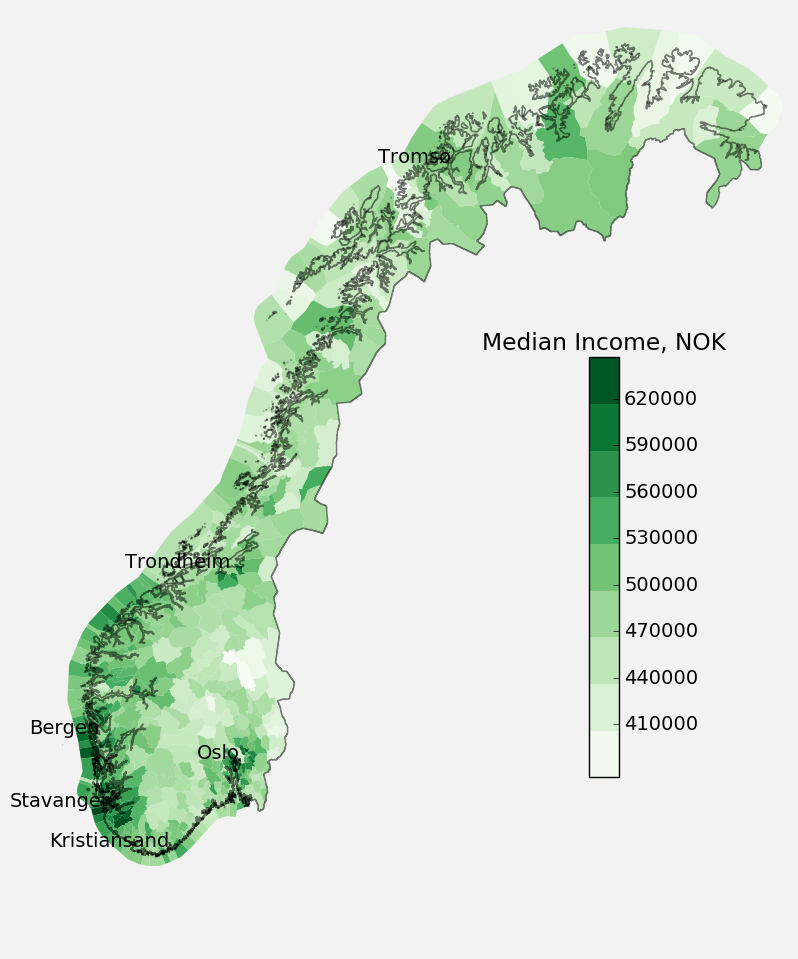

In [99]:
plt.show()

In [100]:
norway_income.save_plot("figures/income_map.png")

//anaconda/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


#### compare changes

In [30]:
income.head()

,region,husholdningstype,tid,statistikkvariabel,"Inntekt etter skatt, etter region, husholdningstype, tid og statistikkvariabel"
0,0101 Halden,0000 Alle husholdninger,2005,Husholdninger,12999.0
1,0101 Halden,0000 Alle husholdninger,2005,"Inntekt etter skatt, median (kr)",296000.0
2,0101 Halden,0000 Alle husholdninger,2006,Husholdninger,12575.0
3,0101 Halden,0000 Alle husholdninger,2006,"Inntekt etter skatt, median (kr)",310000.0
4,0101 Halden,0000 Alle husholdninger,2007,Husholdninger,12793.0


In [31]:
income = pd.read_csv("http://data.ssb.no/api/v0/dataset/49678.csv", sep=";", na_values = [".", ".."])

income_2015 = income[income.tid==2015]
income_2015 = income_2015[income_2015.husholdningstype =="0000 Alle husholdninger"]
income_2015 = income_2015[income_2015.statistikkvariabel =="Inntekt etter skatt, median (kr)"]
income_2015 = income_2015.iloc[:,[0,4]]
income_2015.columns = ["region", "income_2015"]
income_2015.loc[:,"income_2015"] = income_2015.income_2015.astype(float)
income_2015.head()

,region,income_2015
21,0101 Halden,451000.0
131,0104 Moss,449000.0
241,0105 Sarpsborg,456000.0
351,0106 Fredrikstad,470000.0
461,0111 Hvaler,535000.0


In [32]:

income_2010 = income[income.tid==2010]
income_2010 = income_2010[income_2010.husholdningstype =="0000 Alle husholdninger"]
income_2010 = income_2010[income_2010.statistikkvariabel =="Inntekt etter skatt, median (kr)"]
income_2010 = income_2010.iloc[:,[0,4]]
income_2010.columns = ["region", "income_2010"]
income_2010.loc[:,"income_2010"] = income_2010.income_2010.astype(float)
income_2010.head()


,region,income_2010
11,0101 Halden,378000.0
121,0104 Moss,378000.0
231,0105 Sarpsborg,385000.0
341,0106 Fredrikstad,394000.0
451,0111 Hvaler,442000.0


In [33]:
df_income = income_2015.merge(income_2010, on = "region", how = "left")
df_income.head()
df_income["income_diff"] = df_income.income_2015 - df_income.income_2010
df_income.head()

,region,income_2015,income_2010,income_diff
0,0101 Halden,451000.0,378000.0,73000.0
1,0104 Moss,449000.0,378000.0,71000.0
2,0105 Sarpsborg,456000.0,385000.0,71000.0
3,0106 Fredrikstad,470000.0,394000.0,76000.0
4,0111 Hvaler,535000.0,442000.0,93000.0


In [34]:
norway_income_diff = norway_chl(df_income, "region", "income_diff")
norway_income_diff.make_color_map(col_scheme = "Greens")

 array([  26000.        ,   42222.22222222,   58444.44444444,
          74666.66666667,   90888.88888889,  107111.11111111,
         123333.33333333,  139555.55555556,  155777.77777778,  172000.        ])]

In [35]:
norway_income_diff.draw_map(title="Income, Change, NOK")

(<matplotlib.figure.Figure at 0x11671ddd8>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x11670f358>)

//anaconda/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


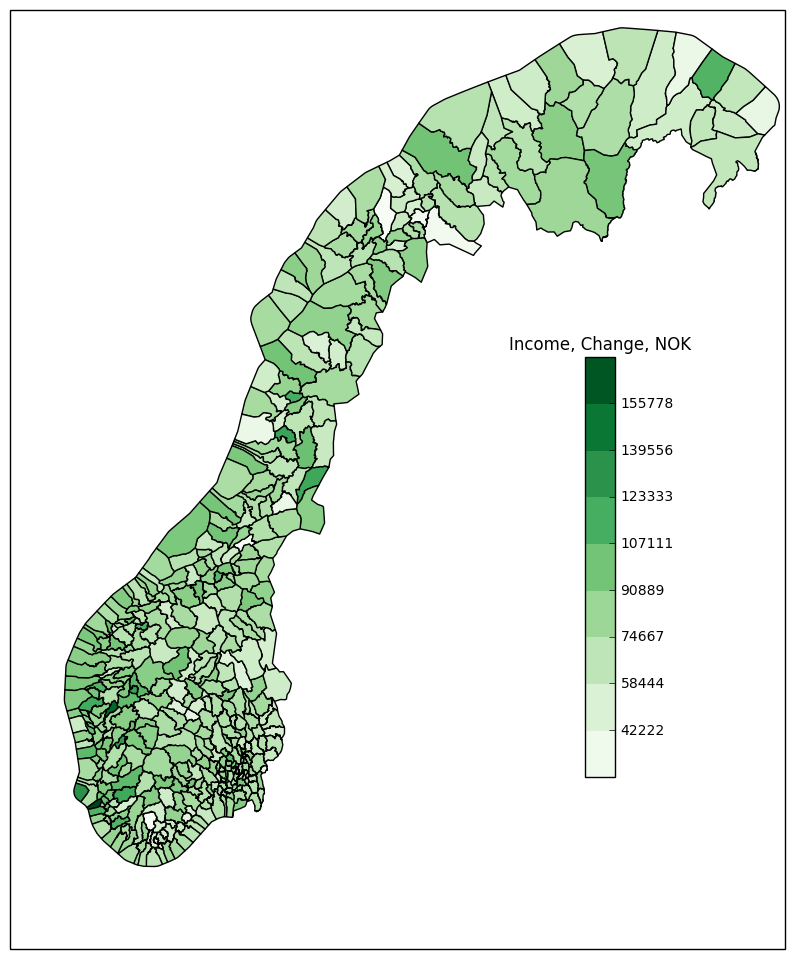

In [36]:
plt.show()

In [38]:
norway_income_diff.save_plot("figures/change_income_map.png")


//anaconda/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


#### Immigration by municipality, 2016

In [5]:
innvand = pd.read_csv("http://data.ssb.no/api/v0/dataset/48644.csv?lang=en", sep=",", na_values = [".", ".."])
befolk = pd.read_csv("http://data.ssb.no/api/v0/dataset/1108.csv?lang=en", sep=",", na_values = [".", ".."])

innvand16 = innvand[innvand.time == 2016]

tot_innvand16 = innvand16.groupby("region")["Immigrants by region, sex, country background and time"].aggregate(sum)

befolk16 = befolk[befolk.contents == "Population at the beginning of the quarter"]
befolk16 = befolk16.iloc[:,[0,3]]
befolk16 = befolk16.set_index("region")

immig = pd.concat([befolk16, tot_innvand16], axis=1)
immig.columns = ["population", "immigrants"]
immig.loc[:,"population"] = immig.population.astype(float)
immig["immig_perc"] = immig.immigrants/immig.population*100

In [11]:
immig.reset_index(inplace=True)

In [17]:
norway_immig = norway_chl(immig, "index", "immig_perc")
norway_immig.make_color_map(col_scheme = "YlGn")
immig_map = norway_immig.draw_map(title="% Immigrants", legend_precision = 0)

//anaconda/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


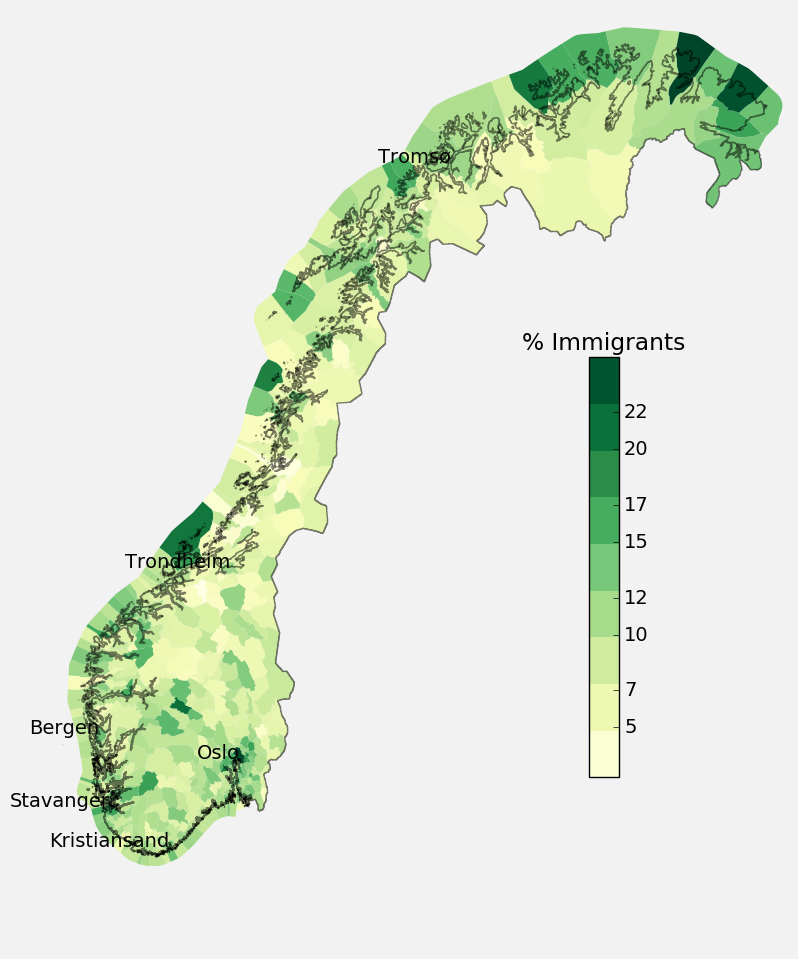

In [18]:
plt.show()

In [20]:
norway_immig.save_plot("figures/immigrant_map.png")

//anaconda/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)
